In [37]:
#%%
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity



In [38]:
#%%
# Load datasets
users = pd.read_csv('Users.csv')
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')



C:\Users\Subham Gupta\AppData\Local\Temp\ipykernel_38216\2291355024.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [39]:
# Get dataset info

users.info()
books.info()
ratings.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)


In [40]:
# %%

users



,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [41]:

# %%
books


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [42]:
# %%
ratings
# %%

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [43]:
# Drop rows with duplicate book title
new_books = books.drop_duplicates('Book-Title')

# %%
new_books
# %%


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [44]:
print(len(books), len(new_books))
print(len(new_books) - len(books))

## - Negative sign says that the Duplicates have been remooved





271360 242135
-29225


In [45]:
# %%
# Merge ratings and new_books df

# before merging Columns Count 
print(f"Rating Column count = {(ratings.shape[1])} \n new_books Column count = {new_books.shape[1]}")
#%%

Rating Column count = 3 
 new_books Column count = 8


In [46]:
ratings_with_name = ratings.merge(new_books, on='ISBN')

#%%  
# Seepreviously there were 3 +8 = 11 columns but since we merged by ISBNN it gets added and reduced the no by one
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...
4,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...
...,...,...,...,...,...,...,...,...,...,...
883074,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
883075,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
883076,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
883077,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [47]:
# %%
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
2,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
3,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...
4,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...,http://images.amazon.com/images/P/0449006522.0...
...,...,...,...,...,...,...,...,...,...,...
883074,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
883075,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
883076,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
883077,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [48]:
#%%
# Drop non-relevant columns
ratings_with_name.drop(['ISBN', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1, inplace = True)

In [49]:
ratings_with_name

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276729,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
3,276746,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group
4,276746,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books
...,...,...,...,...,...,...
883074,276704,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig
883075,276704,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press
883076,276706,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf
883077,276709,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books


In [50]:
# %%
# Merge new 'ratings_with_name' df with users df
users_ratings_matrix = ratings_with_name.merge(users, on='User-ID')



In [51]:

# Drop non-relevant columns
users_ratings_matrix.drop(['Location', 'Age'], axis = 1, inplace = True)


In [52]:
# Print the first few rows of the new dataframe
users_ratings_matrix.head()

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276729,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
3,276746,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group
4,276746,0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books


In [53]:
# %%
# Check for null values
users_ratings_matrix.isna().sum()


User-ID                0
Book-Rating            0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              1
dtype: int64

In [54]:
# %%
# Drop null values
users_ratings_matrix.dropna(inplace = True)
print(users_ratings_matrix.isna().sum())

# %%
# Filter down 'users_ratings_matrix' on the basis of users who gave many book ratings
x = users_ratings_matrix.groupby('User-ID').count()['Book-Rating'] > 100
x


User-ID                0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64


User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278844    False
278846    False
278849    False
278851    False
278854    False
Name: Book-Rating, Length: 83910, dtype: bool

In [55]:
#%%
knowledgeable_users = x[x].index
knowledgeable_users
#%%
filtered_users_ratings = users_ratings_matrix[users_ratings_matrix['User-ID'].isin(knowledgeable_users)]

In [56]:
# Filter down 'users_ratings_matrix' on the basis of books with most ratings
y = filtered_users_ratings.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index
final_users_ratings = filtered_users_ratings[filtered_users_ratings['Book-Title'].isin(famous_books)]

In [57]:

# %%
famous_books


Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '2nd Chance',
       '4 Blondes',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Wicked: The Life and Times of the Wicked Witch of the West', 'Wifey',
       'Wild Animus', 'Without Remorse',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=620)

In [58]:
# %%
filtered_users_ratings

,User-ID,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
990,277427,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
991,277427,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons
992,277427,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning
993,277427,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co
994,277427,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books
...,...,...,...,...,...,...
882965,276680,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004,Bloomsbury USA
882966,276680,7,Fairy Tale (Common Reader Editions),Alice Thomas Ellis,2001,Akadine Press
882967,276680,8,Parnassus on Wheels (Common Reader Editions),Christopher Morley,2000,Joiner/Oriel Inc
882968,276680,0,Haunted Bookshop (Common Reader Editions),Christopher Morley,2000,Akadine Press


In [59]:
#%% 
filtered_users_ratings.columns


Index(['User-ID', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher'],
      dtype='object')

In [60]:
# %%
# Pivot table creation
pivot_table = final_users_ratings.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')
pivot_table

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,274808,275020,275970,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#%%
# Filling the NA values with '0'
pivot_table.fillna(0, inplace = True)
pivot_table.head()

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,274808,275020,275970,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:

# %%
# Standardize the pivot table
scaler = StandardScaler(with_mean=True, with_std=True)
pivot_table_normalized = scaler.fit_transform(pivot_table)

# Convert back to DataFrame
normalized_df = pd.DataFrame(
    pivot_table_normalized, 
    columns=pivot_table.columns, 
    index=pivot_table.index
)

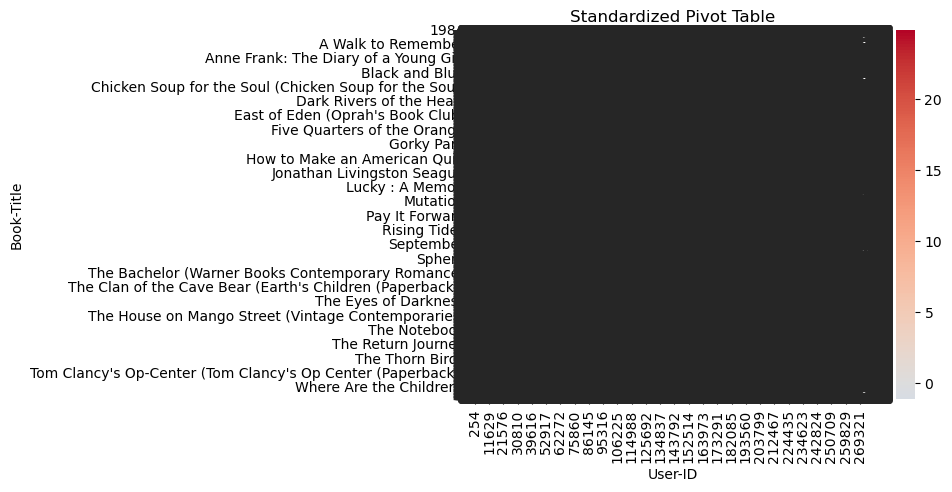

In [63]:
# # Heatmap visualization
# sns.heatmap(normalized_df, annot=True, cmap='coolwarm', center=0)
# plt.title('Standardized Pivot Table')
# plt.show()

# %%
# Calculate the similarity matrix for all the books
similarity_score = cosine_similarity(pivot_table_normalized)
# similarity_score

In [64]:
 #%% 
def recommend(book_name):
    
    # Returns the numerical index for the book_name
    index = np.where(pivot_table.index==book_name)[0][0]
    # Sorts the similarities for the book_name in descending order
    similar_books = sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:6]
    
    # To return result in list format
    data = []
    
    for index,similarity in similar_books:
        item = []
        # Get the book details by index
        temp_df = new_books[new_books['Book-Title'] == pivot_table.index[index]]
        
        # Only add the title, author, and image-url to the result
        item.extend(temp_df['Book-Title'].values)
        item.extend(temp_df['Book-Author'].values)
        item.extend(temp_df['Image-URL-M'].values)
        
        data.append(item)
    return data

In [66]:
#%%

# Validating the model 
# Call the recommend method
recommend('1984')

#%%
#  Conclusion : Building a recommendation engine using collaborative filtering is a robust way to enhance personalization in services.
# %%

[["Foucault's Pendulum",
  'Umberto Eco',
  'http://images.amazon.com/images/P/0345368754.01.MZZZZZZZ.jpg'],
 ['Tis : A Memoir',
  'Frank McCourt',
  'http://images.amazon.com/images/P/0684848783.01.MZZZZZZZ.jpg'],
 ['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['The Glass Lake',
  'Maeve Binchy',
  'http://images.amazon.com/images/P/0440221595.01.MZZZZZZZ.jpg'],
 ['Summer Pleasures',
  'Nora Roberts',
  'http://images.amazon.com/images/P/0373218397.01.MZZZZZZZ.jpg']]